<a href="https://colab.research.google.com/github/khairav/MachinLearning-Mini_Project/blob/main/submissiondicodingbatugunting_kertas__19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission Project Machine Learning Klasifikasi Gambar

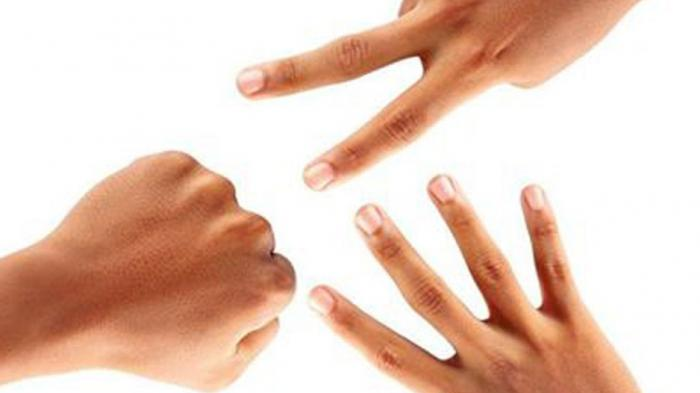


** Deni Diana **

** Kota Tangerang Selatan, Banten **

** Email : gets.deden@gmail.com**

Program jaringan saraf tiruan digunakan untuk mengenali bentuk tangan yang membentuk gunting, batu, atau kertas


**Langkah-Lahkah Yang dijalankan**
1. Import Library yang dibutuhkan
2. import Dataset Image
3. Preparation Data
4. Visualisasi Data
5. Split
6. Pemodelan
7. Processing 
8. Evaluasi
9. Kesimpulan

# 1. Import Library

In [ ]:
#import Library
import os
import random
from shutil import copyfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

print("Import Library Complete")

Import Library Complete


# 1. Import Dataset Image

In [6]:
# menentukan nama direktori untuk training data dan validation data
base_dir = '/content/sample_data'
#project_dir = os.path.join(base_dir,'Project')
#os.mkdir(project_dir)
os.chdir("/content/sample_data/Project")
!ls

In [9]:
#import Dataset Image
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-17 20:20:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.34MB/s    in 3m 17s  

2021-04-17 20:23:45 (1.56 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
#ekstraksi File Sip
import zipfile
import os
file_downloads = '/content/sample_data/Project/rockpaperscissors.zip'
 
read_zip= zipfile.ZipFile(file_downloads, 'r')
read_zip.extractall('/content/sample_data/Project/')
read_zip.close()
 


In [16]:
base_dir = '/content/sample_data/Project/rockpaperscissors/rps-cv-images'

# 4. Visulisasi Data

In [15]:
#Check Jumlah Data Image
os.chdir("/content/sample_data/Project/rockpaperscissors/")
countrock = len(os.listdir('/content/sample_data/Project/rockpaperscissors/rock'))
countpaper = len(os.listdir('/content/sample_data/Project/rockpaperscissors/paper'))
countsci = len(os.listdir('/content/sample_data/Project/rockpaperscissors/scissors'))
print("Jumlah gambar rock: ", countrock)
print("Jumlah gambar paper: ", countpaper)
print("Jumlah gambar scissors: ", countsci)


Jumlah gambar rock:  726
Jumlah gambar paper:  712
Jumlah gambar scissors:  750


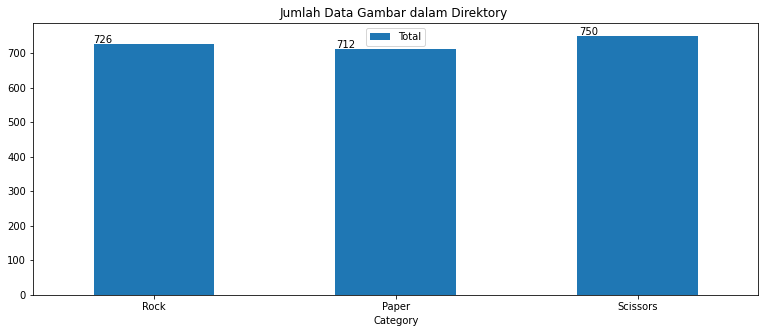

In [12]:
#visualisasi Jumlah Image dalam folder 'Rock', 'Paper', 'Scissors'
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
image_dir = pd.DataFrame({'Category': ['Rock', 'Paper', 'Scissors'], 'Total': [countrock, countpaper, countsci]})
ax = image_dir.plot.bar(x='Category', y='Total', rot=0, figsize=(13, 5))
plt.title('Jumlah Data Gambar dalam Direktory ')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Split train 60 dan validation 40

In [17]:

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest',
                                           validation_split=0.4
                                  )


train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                   subset='training')

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)


validation_generator = validation_datagen.flow_from_directory(base_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Pemodelan 

In [18]:

model_class_img = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(60, 40, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model_class_img.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 36, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 36, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 36, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 9, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16128)             0

In [27]:
nama_model = "mobilenet_v3_small_100_224" # @param ['bit_s-r50x1', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'inception_v3', 'inception_resnet_v2', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152']

model_handle_map = {
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(nama_model)
pixels = model_image_size_map.get(nama_model, 224)

print(f"Selected model: {nama_model} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 32

Selected model: mobilenet_v3_small_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5
Input size (224, 224)


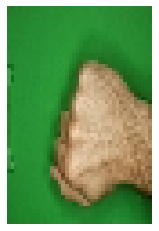

True label: rock
Predicted label: rock


In [35]:
import numpy as np

def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model_class_img.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [36]:
saved_model_path = f"/content/sample_data/Project/rockpaperscissors/saved_model_{nama_model}"
tf.saved_model.save(model_class_img, saved_model_path)

INFO:tensorflow:Assets written to: /content/sample_data/Project/rockpaperscissors/saved_model_mobilenet_v3_small_100_224/assets


In [39]:
optimize_lite_model = False 
num_calibration_examples = 60 
representative_dataset = None
if optimize_lite_model and num_calibration_examples:
  # Use a bounded number of training examples without labels for calibration.
  # TFLiteConverter expects a list of input tensors, each with batch size 1.
  representative_dataset = lambda: itertools.islice(
      ([image[None, ...]] for batch, _ in train_generator for image in batch),
      num_calibration_examples)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
if optimize_lite_model:
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  if representative_dataset:  # This is optional, see above.
    converter.representative_dataset = representative_dataset
lite_model_content = converter.convert()

with open(f"/content/sample_data/Project/rockpaperscissors/saved_model_{model_name}.tflite", "wb") as f:
  f.write(lite_model_content)
print("Wrote %sTFLite model of %d bytes." %
      ("optimized " if optimize_lite_model else "", len(lite_model_content)))


Wrote TFLite model of 16985772 bytes.


In [40]:
interpreter = tf.lite.Interpreter(model_content=lite_model_content)
# This little helper wraps the TF Lite interpreter as a numpy-to-numpy function.
def lite_model(images):
  interpreter.allocate_tensors()
  interpreter.set_tensor(interpreter.get_input_details()[0]['index'], images)
  interpreter.invoke()
  return interpreter.get_tensor(interpreter.get_output_details()[0]['index'])


# Pengujian 

In [30]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, mode=auto, verbose=1, factor=0.5, min_lr=0.000003)

# menggunakan callback yang akan menghentikan training apabila akurasi sudah mencapai 97%
accuracythreshold = 99e-2
class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nMencapai akurasi %2.2f%% , training dihentikan!" %(accuracythreshold*100))   
          self.model_class_img.stop_training = True


In [31]:
#model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])
# mengcompile model Convolutional Neural Network
model_class_img.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(),  metrics=['accuracy'])

# training model Convolutional Neural Network
history = model_class_img.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[AccCallback()])


Epoch 1/20
25/25 - 15s - loss: 0.0758 - accuracy: 0.9727 - val_loss: 0.0104 - val_accuracy: 0.9937
Epoch 2/20
25/25 - 15s - loss: 0.0484 - accuracy: 0.9800 - val_loss: 0.0652 - val_accuracy: 0.9937
Epoch 3/20
25/25 - 15s - loss: 0.0763 - accuracy: 0.9792 - val_loss: 0.0135 - val_accuracy: 0.9937
Epoch 4/20
25/25 - 15s - loss: 0.0534 - accuracy: 0.9850 - val_loss: 0.5840 - val_accuracy: 0.7688
Epoch 5/20
25/25 - 15s - loss: 0.0609 - accuracy: 0.9775 - val_loss: 0.0318 - val_accuracy: 0.9875
Epoch 6/20
25/25 - 15s - loss: 0.0884 - accuracy: 0.9779 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7/20
25/25 - 15s - loss: 0.0991 - accuracy: 0.9675 - val_loss: 0.1923 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 15s - loss: 0.1103 - accuracy: 0.9636 - val_loss: 0.0476 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 15s - loss: 0.0449 - accuracy: 0.9844 - val_loss: 0.1454 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 15s - loss: 0.0612 - accuracy: 0.9787 - val_loss: 0.1695 - val_accuracy: 0.9312
Epoch 11/

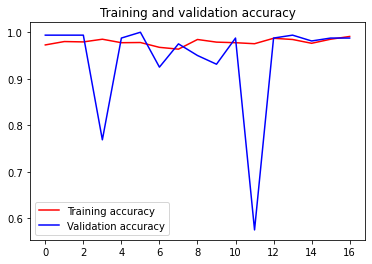

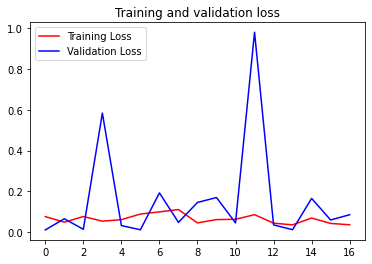

In [33]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


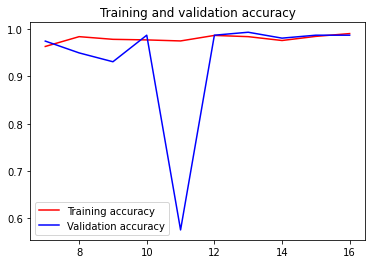

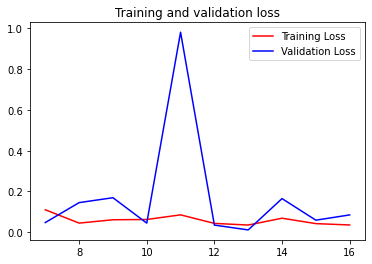

In [34]:
%matplotlib inline
acc = history.history['accuracy'][7:]
val_acc = history.history['val_accuracy'][7:]
loss = history.history['loss'][7:]
val_loss = history.history['val_loss'][7:]

epochs = range(7,7+len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
num_eval_examples = 50 
eval_dataset = ((image, label)  # TFLite expects batch size 1.
                for batch in train_generator
                for (image, label) in zip(*batch))
count = 0
count_lite_tf_agree = 0
count_lite_correct = 0
for image, label in eval_dataset:
  probs_lite = lite_model(image[None, ...])[0]
  probs_tf = model_class_img(image[None, ...]).numpy()[0]
  y_lite = np.argmax(probs_lite)
  y_tf = np.argmax(probs_tf)
  y_true = np.argmax(label)
  count +=1
  if y_lite == y_tf: count_lite_tf_agree += 1
  if y_lite == y_true: count_lite_correct += 1
  if count >= num_eval_examples: break
print("TF Lite model agrees with original model on %d of %d examples (%g%%)." %
      (count_lite_tf_agree, count, 100.0 * count_lite_tf_agree / count))
print("TF Lite model is accurate on %d of %d examples (%g%%)." %
      (count_lite_correct, count, 100.0 * count_lite_correct / count))


TF Lite model agrees with original model on 50 of 50 examples (100%).
TF Lite model is accurate on 49 of 50 examples (98%).


# Kesimpulan